In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0


In [12]:
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0
    return results


train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

In [13]:
train_data.shape

(25000, 10000)

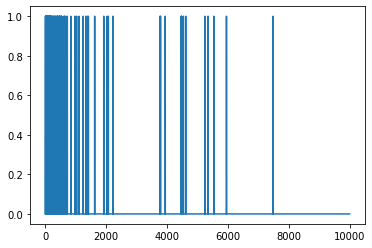

In [14]:
plt.plot(train_data[0])

In [15]:
baseline_model = keras.Sequential([
    # `input_shape` is only required here so that `.summary` works.
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [16]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 6s - loss: 0.5230 - accuracy: 0.8042 - binary_crossentropy: 0.5230 - val_loss: 0.3640 - val_accuracy: 0.8699 - val_binary_crossentropy: 0.3640
Epoch 2/20
25000/25000 - 3s - loss: 0.2668 - accuracy: 0.9042 - binary_crossentropy: 0.2668 - val_loss: 0.2853 - val_accuracy: 0.8870 - val_binary_crossentropy: 0.2853
Epoch 3/20
25000/25000 - 3s - loss: 0.1897 - accuracy: 0.9333 - binary_crossentropy: 0.1897 - val_loss: 0.2863 - val_accuracy: 0.8858 - val_binary_crossentropy: 0.2863
Epoch 4/20
25000/25000 - 3s - loss: 0.1511 - accuracy: 0.9483 - binary_crossentropy: 0.1511 - val_loss: 0.3053 - val_accuracy: 0.8796 - val_binary_crossentropy: 0.3053
Epoch 5/20
25000/25000 - 3s - loss: 0.1237 - accuracy: 0.9588 - binary_crossentropy: 0.1237 - val_loss: 0.3301 - val_accuracy: 0.8759 - val_binary_crossentropy: 0.3301
Epoch 6/20
25000/25000 - 3s - loss: 0.1000 - accuracy: 0.9693 - binary_crossentropy: 0.1000 - val_loss: 0.3621

In [17]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

smaller_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [18]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 3s - loss: 0.6001 - accuracy: 0.7548 - binary_crossentropy: 0.6001 - val_loss: 0.5130 - val_accuracy: 0.8398 - val_binary_crossentropy: 0.5130
Epoch 2/20
25000/25000 - 3s - loss: 0.4237 - accuracy: 0.8730 - binary_crossentropy: 0.4237 - val_loss: 0.3916 - val_accuracy: 0.8695 - val_binary_crossentropy: 0.3916
Epoch 3/20
25000/25000 - 3s - loss: 0.3123 - accuracy: 0.8990 - binary_crossentropy: 0.3123 - val_loss: 0.3184 - val_accuracy: 0.8803 - val_binary_crossentropy: 0.3184
Epoch 4/20
25000/25000 - 3s - loss: 0.2385 - accuracy: 0.9207 - binary_crossentropy: 0.2385 - val_loss: 0.2922 - val_accuracy: 0.8865 - val_binary_crossentropy: 0.2922
Epoch 5/20
25000/25000 - 3s - loss: 0.1986 - accuracy: 0.9344 - binary_crossentropy: 0.1986 - val_loss: 0.2839 - val_accuracy: 0.8860 - val_binary_crossentropy: 0.2839
Epoch 6/20
25000/25000 - 3s - loss: 0.1725 - accuracy: 0.9425 - binary_crossentropy: 0.1725 - val_loss: 0.2843

In [19]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_10 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [20]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 9s - loss: 0.3438 - accuracy: 0.8526 - binary_crossentropy: 0.3438 - val_loss: 0.2914 - val_accuracy: 0.8814 - val_binary_crossentropy: 0.2914
Epoch 2/20
25000/25000 - 8s - loss: 0.1390 - accuracy: 0.9512 - binary_crossentropy: 0.1390 - val_loss: 0.3445 - val_accuracy: 0.8660 - val_binary_crossentropy: 0.3445
Epoch 3/20
25000/25000 - 8s - loss: 0.0400 - accuracy: 0.9894 - binary_crossentropy: 0.0400 - val_loss: 0.4574 - val_accuracy: 0.8692 - val_binary_crossentropy: 0.4574
Epoch 4/20
25000/25000 - 7s - loss: 0.0049 - accuracy: 0.9994 - binary_crossentropy: 0.0049 - val_loss: 0.6098 - val_accuracy: 0.8684 - val_binary_crossentropy: 0.6098
Epoch 5/20
25000/25000 - 8s - loss: 0.0010 - accuracy: 1.0000 - binary_crossentropy: 0.0010 - val_loss: 0.6974 - val_accuracy: 0.8716 - val_binary_crossentropy: 0.6974
Epoch 6/20
25000/25000 - 8s - loss: 7.6054e-04 - accuracy: 1.0000 - binary_crossentropy: 7.6054e-04 - val_loss

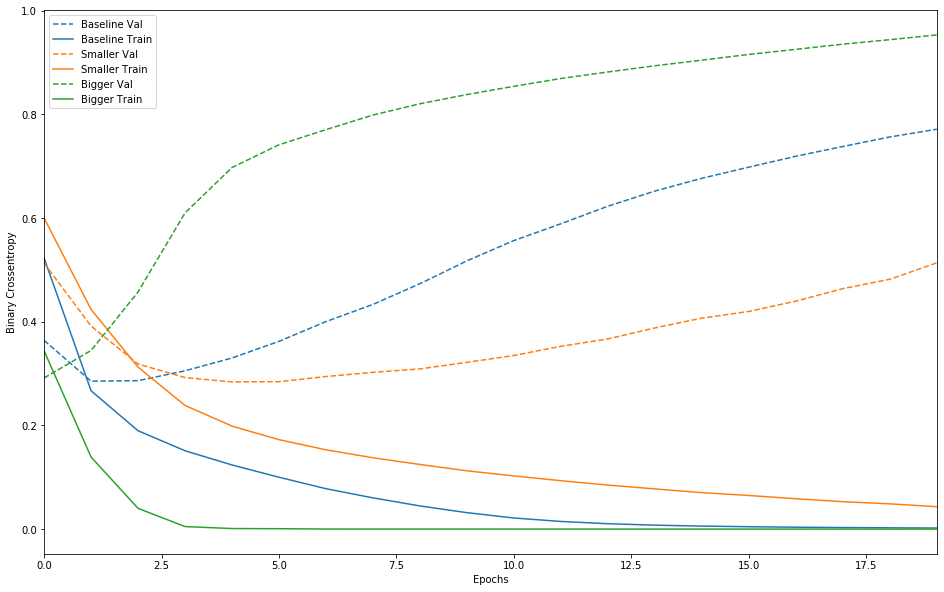

In [22]:
def plot_history(histories, key='binary_crossentropy'):
    plt.figure(figsize=(16,10))

    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()

    plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])


In [23]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 4s - loss: 0.5169 - accuracy: 0.8151 - binary_crossentropy: 0.4750 - val_loss: 0.3805 - val_accuracy: 0.8762 - val_binary_crossentropy: 0.3356
Epoch 2/20
25000/25000 - 3s - loss: 0.3072 - accuracy: 0.9069 - binary_crossentropy: 0.2580 - val_loss: 0.3380 - val_accuracy: 0.8883 - val_binary_crossentropy: 0.2857
Epoch 3/20
25000/25000 - 3s - loss: 0.2581 - accuracy: 0.9282 - binary_crossentropy: 0.2035 - val_loss: 0.3387 - val_accuracy: 0.8867 - val_binary_crossentropy: 0.2827
Epoch 4/20
25000/25000 - 3s - loss: 0.2351 - accuracy: 0.9382 - binary_crossentropy: 0.1775 - val_loss: 0.3517 - val_accuracy: 0.8824 - val_binary_crossentropy: 0.2930
Epoch 5/20
25000/25000 - 3s - loss: 0.2216 - accuracy: 0.9440 - binary_crossentropy: 0.1616 - val_loss: 0.3732 - val_accuracy: 0.8768 - val_binary_crossentropy: 0.3125
Epoch 6/20
25000/25000 - 3s - loss: 0.2103 - accuracy: 0.9493 - binary_crossentropy: 0.1488 - val_loss: 0.3837

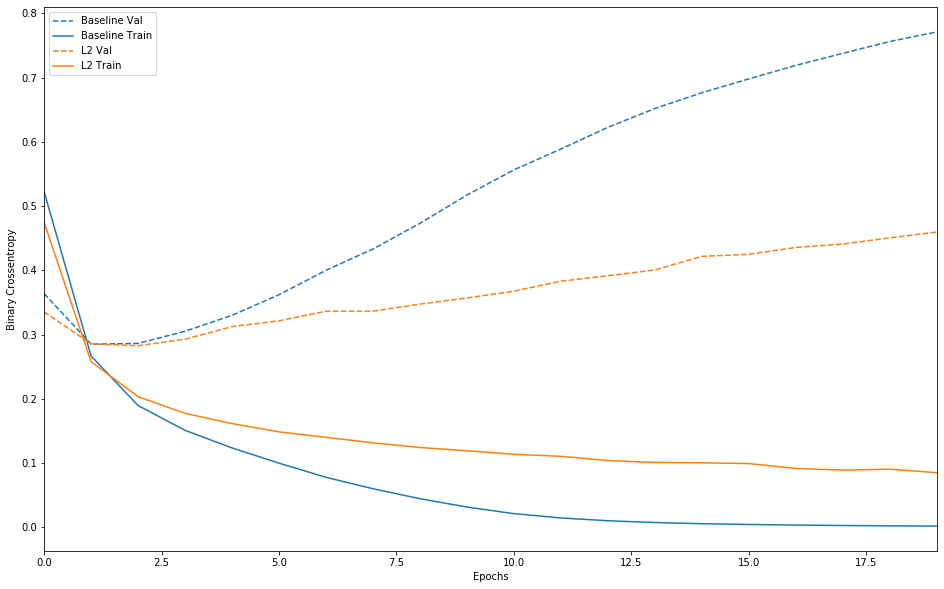

In [24]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

In [25]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 4s - loss: 0.6493 - accuracy: 0.6387 - binary_crossentropy: 0.6493 - val_loss: 0.5756 - val_accuracy: 0.7836 - val_binary_crossentropy: 0.5756
Epoch 2/20
25000/25000 - 3s - loss: 0.5318 - accuracy: 0.8116 - binary_crossentropy: 0.5318 - val_loss: 0.4588 - val_accuracy: 0.8681 - val_binary_crossentropy: 0.4588
Epoch 3/20
25000/25000 - 3s - loss: 0.4249 - accuracy: 0.8617 - binary_crossentropy: 0.4249 - val_loss: 0.3579 - val_accuracy: 0.8828 - val_binary_crossentropy: 0.3579
Epoch 4/20
25000/25000 - 3s - loss: 0.3488 - accuracy: 0.8957 - binary_crossentropy: 0.3488 - val_loss: 0.3154 - val_accuracy: 0.8873 - val_binary_crossentropy: 0.3154
Epoch 5/20
25000/25000 - 3s - loss: 0.3011 - accuracy: 0.9093 - binary_crossentropy: 0.3011 - val_loss: 0.3041 - val_accuracy: 0.8864 - val_binary_crossentropy: 0.3041
Epoch 6/20
25000/25000 - 3s - loss: 0.2647 - accuracy: 0.9211 - binary_crossentropy: 0.2647 - val_loss: 0.2966

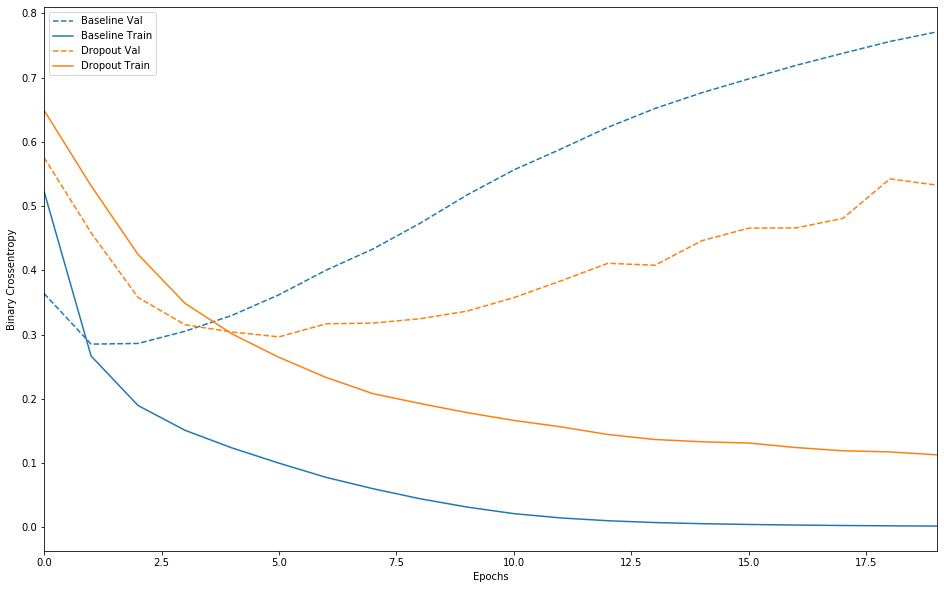

In [26]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])